# Telegram

In [1]:
model = "IMU_N5X_20190114_204922"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json
from scipy.interpolate import spline

In [10]:
with open('./result.json') as f:
    data = json.load(f)
chats = data["chats"]["list"]
group = ""
for chat in chats:
    if chat["name"] == "IMU-Keras":
        group = chat
        break

messages = group["messages"]

bot_messages = []
# ignore first 3 setup messages
for message in messages[3:]:
    if message["from_id"] == 707020808:
        bot_messages.append(message)

epoch = []
loss = []
val_loss = []
for message in bot_messages:
    if message["text"].startswith(model):
        tmp = message["text"].split()
        epoch.append(int(float(tmp[3].replace(";", ""))))
        val_loss.append(float(tmp[7].replace(";", "")))
        loss.append(float(tmp[15].replace(";", "")))

epoch = [x+1 for x in epoch]

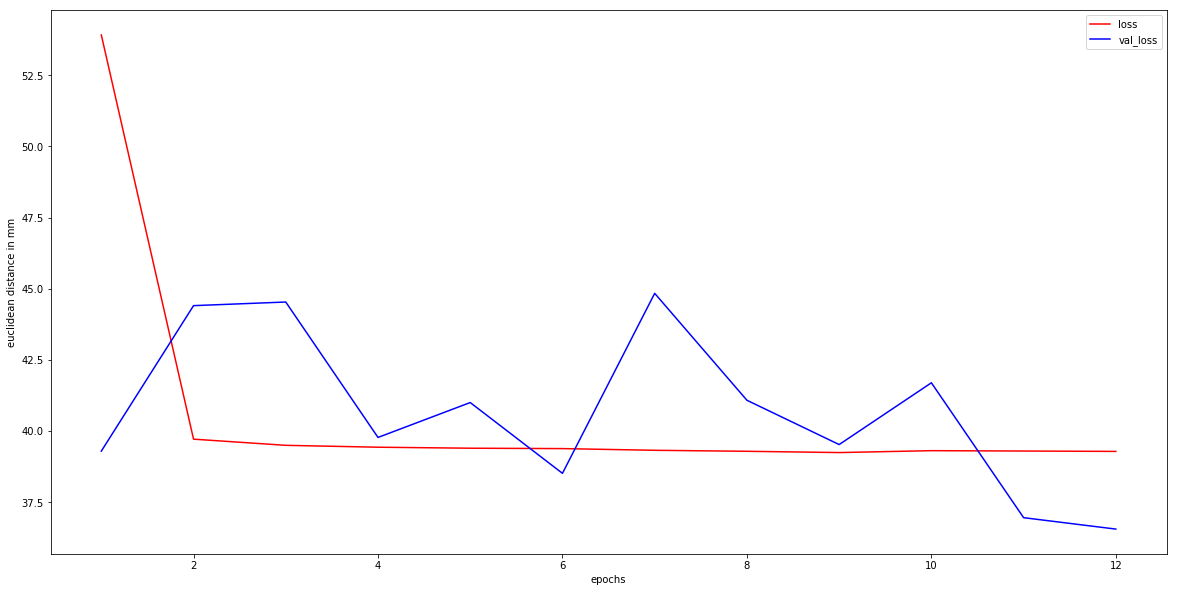

In [11]:
ax = plt.gca()
plt.rcParams['figure.figsize'] = [20, 10]

plt.plot(epoch, loss, 'r', label='loss')
plt.plot(epoch, val_loss, 'b', label='val_loss')
plt.legend(('loss', 'val_loss'), loc='upper right')
plt.xlabel("epochs")
plt.ylabel("euclidean distance in mm")

plt.savefig(str(Path.home()) + "/data/plots/" + model + ".png")
plt.show()

# Tensorboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
loss = pd.read_csv(str(Path.home()) + "/data/plots/run_IMU_N5X_20181224_174958-tag-loss.csv", ",")
val_loss = pd.read_csv(str(Path.home()) + "/data/plots/run_IMU_N5X_20181224_174958-tag-val_loss.csv", ",")

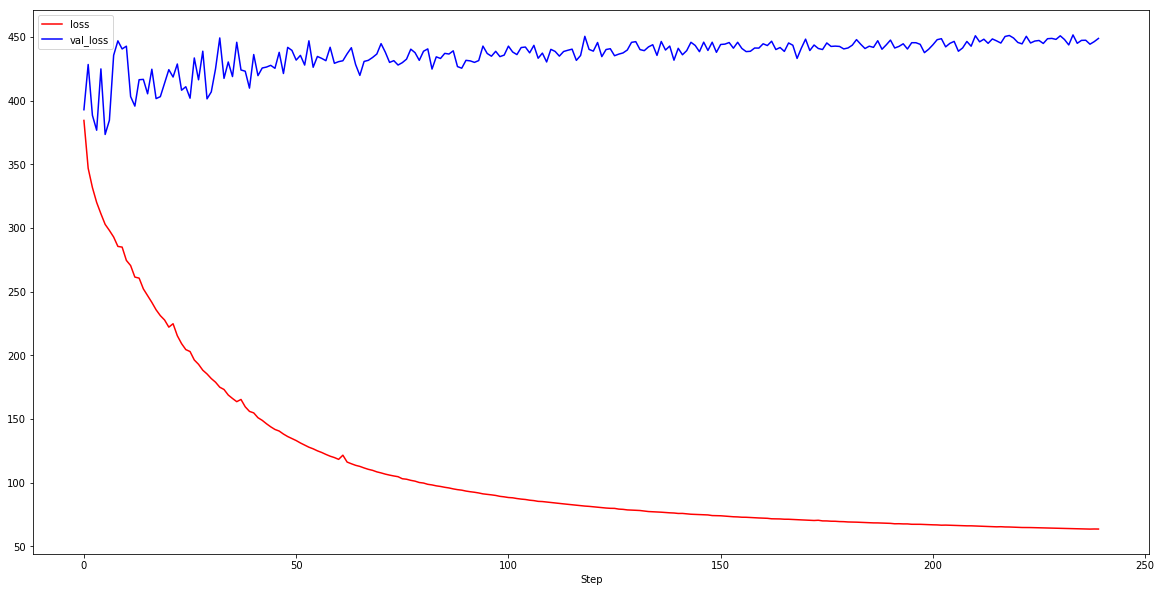

In [15]:
ax = plt.gca()
plt.rcParams['figure.figsize'] = [20, 5]

loss.plot(kind='line',x='Step',y='Value',color='red', ax=ax, label='loss')
val_loss.plot(kind='line',x='Step',y='Value',color='blue', ax=ax, label='val_loss')


plt.savefig(str(Path.home()) + "/data/plots/run_IMU_N5X_20181224_174958-tag.png")
plt.show()